In [ ]:
# Data manipulation and analysis
import pandas as pd  # Used for data manipulation and analysis, particularly with DataFrames
import numpy as np  # Used for numerical operations and handling arrays

In [ ]:
df = pd.read_csv("/content/sample.csv")

In [ ]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0


In [ ]:
df.shape

(93, 7)

In [ ]:
print("Null values in each column:")
print(df.isnull().sum())

Null values in each column:
tweet_id                    0
author_id                   0
inbound                     0
created_at                  0
text                        0
response_tweet_id          28
in_response_to_tweet_id    25
dtype: int64


Data Preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Import stopwords from NLTK
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
stop_words = set(stopwords.words('english'))
# Define the preprocessing function
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(filtered_words)
df['processed_text'] = df['text'].apply(preprocess_text)
print(df[['text', 'processed_text']].head())

                                                text  \
0  @AppleSupport causing the reply to be disregar...   
1  @105835 Your business means a lot to us. Pleas...   
2  @76328 I really hope you all change but I'm su...   
3  @105836 LiveChat is online at the moment - htt...   
4  @VirginTrains see attached error message. I've...   

                                      processed_text  
0  applesupport causing reply disregarded tapped ...  
1  business means lot us please dm name zip code ...  
2                         really hope change sure wo  
3  livechat online moment https contact option le...  
4  virgintrains see attached error message tried ...  


In [ ]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,processed_text
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN,applesupport causing reply disregarded tapped ...
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0,business means lot us please dm name zip code ...
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN,really hope change sure wo
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0,livechat online moment https contact option le...
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0,virgintrains see attached error message tried ...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Sample TF-IDF Features:")
print(tfidf_df.head())

TF-IDF Matrix Shape: (93, 475)
Sample TF-IDF Features:
   account  additional  address  adnams  advise  affect  age  ages  ago  \
0      0.0    0.000000      0.0     0.0     0.0     0.0  0.0   0.0  0.0   
1      0.0    0.331294      0.0     0.0     0.0     0.0  0.0   0.0  0.0   
2      0.0    0.000000      0.0     0.0     0.0     0.0  0.0   0.0  0.0   
3      0.0    0.000000      0.0     0.0     0.0     0.0  0.0   0.0  0.0   
4      0.0    0.000000      0.0     0.0     0.0     0.0  0.0   0.0  0.0   

   agoura  ...  within  without        wo  work  working  wtf  xfinity  yard  \
0     0.0  ...     0.0      0.0  0.000000   0.0      0.0  0.0      0.0   0.0   
1     0.0  ...     0.0      0.0  0.000000   0.0      0.0  0.0      0.0   0.0   
2     0.0  ...     0.0      0.0  0.436175   0.0      0.0  0.0      0.0   0.0   
3     0.0  ...     0.0      0.0  0.000000   0.0      0.0  0.0      0.0   0.0   
4     0.0  ...     0.0      0.0  0.000000   0.0      0.0  0.0      0.0   0.0   

   yep       

Train a Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# for actual target column
target_column = 'sentiment'

# Check if the target column exists
if target_column not in df.columns:
    print(f"Error: Column '{target_column}' not found in the DataFrame.")
else:
    # Split the data into features and target
    X = tfidf_matrix
    y = df[target_column]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Logistic Regression model
    logistic_model = LogisticRegression(max_iter=1000)
    logistic_model.fit(X_train, y_train)

    # use for predictions
    y_pred = logistic_model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # use for Display results
    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)


Error: Column 'sentiment' not found in the DataFrame.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

data = {
    'text_column': ["I love this!", "I hate this!", "This is amazing!", "This is terrible!"],
    'sentiment': ['positive', 'negative', 'positive', 'negative']
}
df = pd.DataFrame(data)

# Convert 'sentiment' to numeric and handle unexpected vals
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
if df['sentiment'].isnull().any():
    print("Error: Unexpected values in 'sentiment' column. Only 'positive' and 'negative' are allowed.")
    exit()

# Create TF-IDF features
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['text_column'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.2, random_state=42)

# Neural network model
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Initialize the model
input_dim = X_train.shape[1]
nn_model = build_model(input_dim)

# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_conf_matrix = confusion_matrix(y_test, y_pred_nn)
nn_class_report = classification_report(y_test, y_pred_nn)

# Print the results
print("Neural Network Model Accuracy:", nn_accuracy)
print("Neural Network Confusion Matrix:\n", nn_conf_matrix)
print("Neural Network Classification Report:\n", nn_class_report)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 0.6264 - val_accuracy: 1.0000 - val_loss: 0.6471
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - accuracy: 0.0000e+00 - loss: 0.7786 - val_accuracy: 1.0000 - val_loss: 0.6507
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.3333 - loss: 0.6985 - val_accuracy: 1.0000 - val_loss: 0.6545
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 1.0000 - loss: 0.6011 - val_accuracy: 1.0000 - val_loss: 0.6577
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.3333 - loss: 0.7294 - val_accuracy: 1.0000 - val_loss: 0.6609
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6667 - loss: 0.6512 - val_accuracy: 1.0000 - val_loss: 0.6635
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.0000e+00 - loss: 0.7807 - val_accuracy: 1.0000 - val_loss: 0.6664
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.6667 - loss: 0.7191 - val_accuracy: 1.0000 - val_

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Sample data creation (replace this with loading actual data)
data = {
    'text_column': ["I love this!", "I hate this!", "This is amazing!", "This is terrible!"],
    'sentiment': ['positive', 'negative', 'positive', 'negative']
}
df = pd.DataFrame(data)

# Convert 'sentiment' to numeric
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
if df['sentiment'].isnull().any():
    print("Error: Unexpected values in 'sentiment' column. Only 'positive' and 'negative' are allowed.")
    exit()

# Create TF-IDF features
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['text_column'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.2, random_state=42)

# Define the neural network model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.7197 - val_accuracy: 0.0000e+00 - val_loss: 0.7358
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - accuracy: 0.5000 - loss: 0.8133 - val_accuracy: 0.0000e+00 - val_loss: 0.7361
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5000 - loss: 0.7311 - val_accuracy: 0.0000e+00 - val_loss: 0.7365
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.0000e+00 - loss: 0.7401 - val_accuracy: 0.0000e+00 - val_loss: 0.7371
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.5000 - loss: 0.7425 - val_accuracy: 0.0000e+00 - val_loss: 0.7378
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.5000 - loss: 0.6786 - val_accuracy: 0.0000e+00 - val_loss: 0.7388
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5000 - loss: 0.7243 - val_accuracy: 0.0000e+00 - val_loss: 0.7397
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5000 - loss: 0.6570 - val

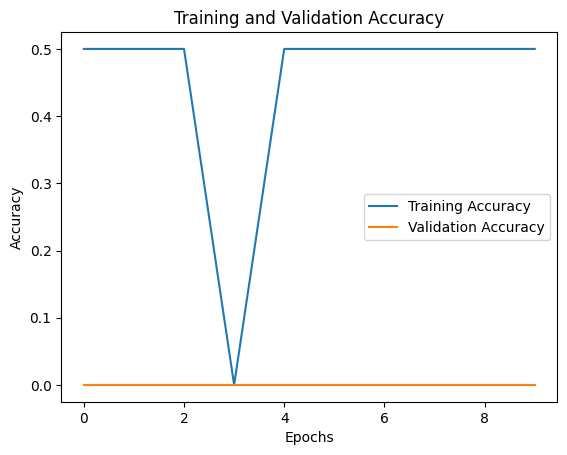

In [ ]:
import matplotlib.pyplot as plt

# Use Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
